In [108]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

[ 카이제곱 적합도 검정 : 일원 카이제곱 검정 ]

한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정

144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

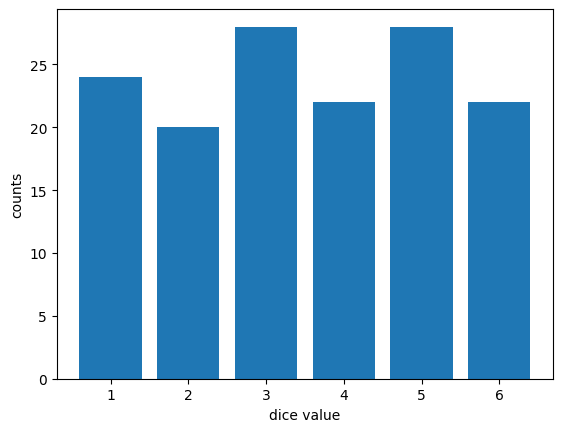

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

# 주사위 눈금의 발생확률은 1/6으로 모두 동일하다. 그러므로 각 눈금의 기댓값은 실제 발생한 모든값을 6으로 나눈 값이다.

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts,df.expected)) 

# p-value는 0.8로 귀무가설인 "각 주사위 눈금 발생비율은 동일함"을 기각 할 수 없다 

[ 카이제곱 독립성 검정 : 이원 카이제곱 검정 ]

모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정 (chi2_contingency)

이원 카이제곱검정 (chi2_contingency ,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때) , 카이제곱독립검정)

다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라

In [106]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')

cdf = pd.crosstab(df['측정회원성별'],df['등급'])
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

# p-value는 0에 근접하므로 측정회원성별 - 등급은 연관이 없다는 귀무가설을 기각하고, 성별관 체력 등급간에는 관련이 있다고 볼 수 있다.

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


[피셔의 정확검정]

카이제곱 검정은 기대빈도의 크기가 5 이상이어야 함

5보다 작으면 사례 수를 증가시키거나, 피셔의 정확검정 (fisher_exact)을 사용해야 함

성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라

In [111]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)

cdf = df.iloc[:-1,:-1]
display(cdf)

from scipy.stats import chi2_contingency,fisher_exact
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

# 카이 제곱 검정시 p-value는 0.07로 귀무가설을 기각하지 못한다. 성별과 참석여부는 관련이 없다(독립이다).

# 하지만 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다.
# 피셔의 정확검정시 0.03의 값을 가지므로 귀무가설을 기각한다. 성별과 참석여부는 관련이 있다. (독립이 아니다)) 
print(fisher_exact(cdf))

,불참,참석
남성,4,2
여성,1,9


Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
0.07023259819117404
SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)
